# **Modern Theory of Detection and Estimation**
## **Lab 2: Machine Learning for Classification**
### **Academic Year 2024/2025**

Bachelor's Degree in:
*   Mobile and Space Communications Engineering (Groups 61 and 65)
*   Sound and Image Engineering (Groups 66 and 69)
*   Telecommunication Technologies Engineering (Groups 91, 92, and 95)
*   Telematics Engineering (Groups 71 and 79)

**Signal Theory and Communications Department - UC3M**

# **Logistics**


**Setup Instructions**

*   Download the file available on Aula Global (in the master group).
*   Save the file to your private folder and navigate to it. Ensure it contains the file named "**Lab_classification_student_24_25.ipynb**".
*   Open Google Colab and upload the notebook.
*   Be patient as it may take a minute for a new Jupyter server to initialize.

Once the server is ready, you're all set to begin! The notebook includes designated areas for writing code solutions and answering questions.





# **Objective**

Maternal health is a critical global concern, particularly in low-resource settings where access to quality healthcare is limited. According to the report "*Trends in Maternal Mortality*" published in February 2023 by the World Health Organization (WHO), **approximately 287,000 women died from complications related to pregnancy and childbirth in 2020** — an alarming statistic equivalent to one maternal death every two minutes worldwide. Many of these deaths were preventable with timely interventions and adequate care. This report presents the most recent estimates available as of November 2024.



**Accurately predicting maternal health risks is essential to preventing these tragedies**. Women with seemingly similar health profiles can experience vastly different outcomes, ranging from smooth deliveries to life-threatening complications. Identifying high-risk cases early and understanding the factors driving these differences are crucial steps in improving maternal health outcomes.


Risk factors for maternal health complications are diverse, spanning physical health issues, socio-economic conditions, and other contextual factors. **By leveraging machine learning techniques applied to clinical data, we aim to develop some models capable of accurately predicting maternal health risks**. This approach enables healthcare providers to deliver timely and targeted interventions, ultimately saving lives and improving maternal outcomes.

In this assignment, we will use the **Maternal Health Risk Data** to **develop machine learning models** that **classify the risk level (low, medium, or high) for pregnant women**. The primary goal is to enhance maternal outcomes by accurately identifying high-risk cases and ensuring timely and appropriate care for those in need.




**LET'S GET STARTED!**

Let's begin by setting up our environment with the required libraries. Once the setup is complete, we will proceed to import and explore the dataset!

In [1]:
# Import the Python libraries that will be used in this lab assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# 1.&nbsp;Maternal Health Risk Data

# 1.1 Description

The Maternal Health Risk Data was collected from various sources, including hospitals, community clinics, and maternal healthcare facilities, through an IoT-based risk monitoring system. This system facilitates real-time monitoring of critical health parameters, such as blood pressure, heart rate, and glucose levels. By integrating IoT devices into healthcare, the system enables continuous data collection, reducing the need for frequent hospital visits —particularly beneficial in remote or underserved areas.


The dataset comprises **$1014$ samples**, each containing **six numerical features** that provide insights into various health parameters relevant to maternal health. Each sample is labeled with a risk level, which falls into one of three classes:

*   **Low Risk** (`low_risk`, class $1$): It indicates a relatively low likelihood of maternal health complications, requiring standard monitoring.
*   **Medium Risk** (`mid_risk`, class $2$): It indicates a moderate likelihood of complications, suggesting the need for closer monitoring or preventive interventions.

*   **High Risk** (`high_risk`, class $3$): It indicates a high likelihood of maternal health complications, requiring immediate attention and potentially urgent medical intervention.

For additional information about the Maternal Health Risk Data, please refer to the dataset's official page: [Maternal Health Risk Data](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data).




# 1.2 Getting the dataset

The first step in this assignment is to download the dataset we will be working with. To do this, we will use the `ucimlrepo` library, which facilitates seamless access to datasets from the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/). This library allows us to load data directly into our environment without the need for manual downloads. To install it, execute the following code cell:

In [2]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


If the installation is successful, you should see a confirmation message similar to the following:

`Installing collected packages: ucimlrepo` \\
`Successfully installed ucimlrepo-0.0.7`

Once the library is installed, execute the following code cell to load the dataset. This will provide the features ($\mathbf{X}$) and the target labels ($y$).


The labels ($y$) represent the class or category for each sample. As previously mentioned, they can take one of three values:
*   `low_risk`
*   `mid risk`
*   `high risk`




In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
maternal_health_risk = fetch_ucirepo(id=863)

X = maternal_health_risk.data['features'].values
y = maternal_health_risk.data['targets']['RiskLevel'].values

The following explanation provides an overview of the data types stored in variables `X` and `y`:

*   `X`: This variable contains the input data or features of the dataset. Specifically, X is a 2D `numpy.ndarray` where each row corresponds to a sample (a maternal health record), and each column corresponds to a specific feature (e.g., blood pressure, heart rate, glucose level, etc.).

*   `y`: This variable contains the class labels (target variable) that indicate the risk level (`low risk`, `mid risk`, or `high risk`) for each sample. It is a one-dimensional `numpy.ndarray`, where each element corresponds to the risk level of a specific sample in `X`.






# 1.3 Dataset description

As outlined in Section 1.1, each sample in the dataset consists of six attributes, or features, representing key health indicators used to assess maternal health risks. These attributes are described as follows:

1.   **Age** (`float64`): The age of the woman (in years) at the time of pregnancy.
2.   **SystolicBP** (`float64`): Systolic blood pressure (in mmHg). It represents the upper value of blood pressure, which is a critical health indicator during pregnancy.
3.   **DiastolicBP** (`float64`): Diastolic blood pressure (in mmHg). This is the lower value of blood pressure. This parameter, along with SystolicBP, is a crucial indicator for monitoring maternal health during pregnancy.
4.   **BS** (`float64`):  Blood glucose level (in mmol/L). It is an essential indicator for assessing maternal health and identifying risks such as gestational diabetes.
5.   **BodyTemp** (`float64`): Body temperature of the pregnant woman (in degrees Celsius).

6.   **HeartRate** (`float64`):  Resting heart rate (in beats per minute). It reflects an important physiological parameter used to monitor cardiovascular health and overall well-being during pregnancy.

Additionally, we have the target variable:

*   **RiskLevel** (`object`): The classification target representing the predicted risk intensity level during pregnancy (`low risk`, `mid risk`, or `high risk`). This level is derived from the values of the aforementioned attributes.

Let's display the data for the first sample to gain an overview. To explore other samples, simply modify the index inside the square brackets of `iloc`.

In [4]:
df = pd.DataFrame(data=maternal_health_risk.data['features'], columns=maternal_health_risk.feature_names)

# Add the 'RiskLevel' column (target)
df['RiskLevel'] = maternal_health_risk.data['targets']['RiskLevel']

# Access a specific row, for example, row 0
row = df.iloc[0]
print(row)

Age                   25
SystolicBP           130
DiastolicBP           80
BS                  15.0
BodyTemp            98.0
HeartRate             86
RiskLevel      high risk
Name: 0, dtype: object


*What is the age and maternal health risk level of the woman in the last position?*

In [5]:
last_row = df.iloc[-1]
print(f'Age: {last_row['Age']}')
print(f'Risk Level: {last_row['RiskLevel']}')

Age: 32
Risk Level: mid risk


Finally, because algorithms require numerical data, we need to convert the `RiskLevel` values from words to numbers. Using a mapping dictionary, each risk level will be assigned a numerical code:

*   `low risk` $\rightarrow 1$
*   `mid risk`$\rightarrow 2$
*   `high risk`$\rightarrow 3$

To perform this conversion, execute the following code:

In [6]:
# Define the mapping dictionary
risklevel = {"low risk": 1, "mid risk": 2, "high risk": 3}

# Map the values of y
y = np.array([risklevel[val] for val in y])

You can now observe how each label in `y` has been converted into a numerical value representing the corresponding risk level. To verify this, use the following code to view the last value in `y`:



In [7]:
# Display the risk level for the last sample
print("The numerical risk level for the last sample is:", y[-1])

The numerical risk level for the last sample is: 2


# 1.4 Dataset analysis

Before proceeding with the analysis, it is essential to understand the basic structure of our dataset. Knowing the number of samples and features will provide an overview of its size and complexity. Additionally, we will examine the distribution of samples across the categories in the target variable.

**How many samples are there in this dataset?**

In [8]:
# NOTE: STUDENT CODE HERE
assert(len(X) == len(y))
n_samples = len(X)
print("The number of samples is: ", n_samples)

The number of samples is:  1014


**How many features does each sample have?** Print the result!

In [9]:
# NOTE: STUDENT CODE HERE
n_features = len(X[0])
print("The number of features is: ", n_features)

The number of features is:  6


Now, let's analyze the class distribution. **How many samples are there in each risk level category?**

Print the results to better understand the dataset's balance.

In [10]:
# NOTE: STUDENT CODE HERE
# HINT: You can use the `.count_nonzero()` method from the Numpy library to count occurrences of each risk level
class_counts = [np.count_nonzero(y==i) for i in range(1, 4)]

print('The number of low risk level for pregnant women is: ', class_counts[0])
print('The number of medium risk level for pregnant women is: ', class_counts[1])
print('The number of high risk level for pregnant women is: ', class_counts[2])

The number of low risk level for pregnant women is:  406
The number of medium risk level for pregnant women is:  336
The number of high risk level for pregnant women is:  272


Finally, create a bar chart to visualize the distribution of risk level classes in the dataset. This will provide a clear representation of the class balance.

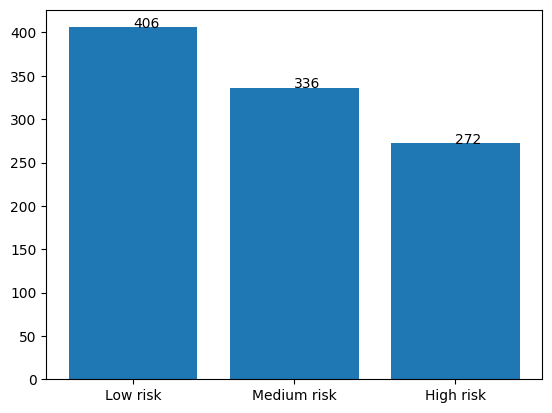

In [11]:
# NOTE: STUDENT CODE HERE
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

labels = ['Low risk', 'Medium risk', 'High risk']
plt.bar(labels, class_counts)
addlabels(labels, class_counts)



---

**Question**: Which category or class contains the highest number of samples,and which one has the lowest?

<font color = 'lightgreen'> The category with the highest number of samples is the 'low risk' category, while the 'high risk' category has the lowest number of samples. </font>

---

# 2. Data preparation: Splitting and standardization

# 2.1 Separation in training and test set

As explained in Lab 1 (*Machine Learning for Regression*), splitting the dataset is essential to ensure an unbiased evaluation of prediction performance. In most cases, it is sufficient to randomly divide the dataset into two subsets:
*   **Training set**: This subset is used to train, or **fit**, **the model**. For instance, it is employed to determine the optimal weights (coefficients) for algorithms such as linear regression or logistic regression.
*   **Test set**: This subset is reserved for an **unbiased evaluation of the model's final performance**. It should not be used for training or validation tasks.

The [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)function from the `scikit-learn` library can easily perform this split for you!



**Note:** When comparing machine learning algorithms, it is desirable to fit and evaluate them on the same subsets of the dataset.  This can be ensured by setting a fixed seed for the pseudo-random number generator used during dataset splitting. In the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function, this is achieved by specifying the `random_state` parameter with a fixed integer value.




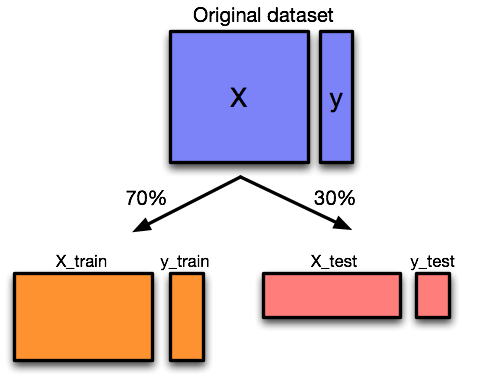

**Your task here is as follows:**


*   Split your **data into training and testing sets**, using a **70/30 split ratio**.

For consistency, use the following variable names for the resulting NumPy arrays:
`X_train`, `X_test`, `y_train`, and `y_test`.

$\underline{\text{Note}}$: To ensure you are working with the same dataset split as your colleagues, please set `random_state = 42` as the seed in the `train_test_split` function.





In [12]:
# NOTE: STUDENT CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

**How many samples are there in the training and test subsets, respectively?**

In [13]:
# NOTE: STUDENT CODE HERE
n_tr  = len(X_train)
n_tst = len(X_test)
print('The number of training samples is:', n_tr)
print('The number of test samples is:', n_tst)

The number of training samples is: 709
The number of test samples is: 305


Let's verify that everything is correct.

**Does the sum of the number of samples in the training and test sets equal the total number of samples?**

In [14]:
# NOTE: STUDENT CODE HERE
n_tot = n_tr + n_tst
assert(n_tot == n_samples)
print('The total number of samples is: ', n_tot)

The total number of samples is:  1014


# 2.2 Standardization of features
In Lab 1 (*Machine Learning for Regression*), we discussed the importance of feature standardization in machine learning algorithms. Standardization involves rescaling features so they have a mean of zero and a standard deviation of one. This process ensures that each feature contributes equally to the model's performance, particularly for algorithms sensitive to data scale.

In this lab, we will apply standardization separately to the training and test sets. The [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class from `scikit-learn` can efficiently perform this task for you!

**Your task is as follows**:
*   Use the `StandardScaler` class from the `sklearn.preprocessing module` to standardize the features in `X_train` and `X_test`.

$\underline{\text{Note}}$: When standardizing, it is crucial to fit the scaler **only** on the training data and then apply the same transformation to the test data. This approach prevents information from the test set from leaking into the training process, ensuring an unbiased evaluation of the model.

**Here's how you can do it**:


*  Create an instance of `StandardScaler`.
*  Fit the scaler using the training data (`X_train`).
*  Generate two new matrices as follows:
    - `X_train_s`: This matrix contains the standardized version of `X_train`, obtained by transforming it with the fitted scaler.
    - `X_test_s`: This matrix contains the standardized version of `X_test`, obtained by applying the same transformation.





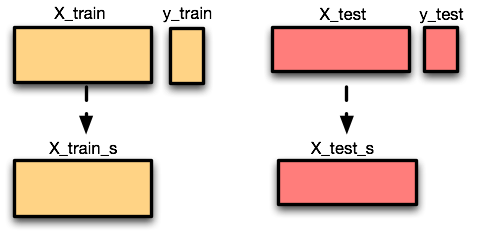

In [15]:
# NOTE: STUDENT CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [16]:
# Iet's check out that everything is ok!
print('TRAINING SET')
print('Mean of each feature: ', np.round(np.mean(X_train_s,0),2))
print('Std of each feature: ', np.round(np.std(X_train_s,0),2))

print('\nTEST SET')
print('Mean of each feature: ', np.round(np.mean(X_test_s,0),2))
print('Std of each feature: ', np.round(np.std(X_test_s,0),2))

TRAINING SET
Mean of each feature:  [ 0.  0. -0. -0.  0. -0.]
Std of each feature:  [1. 1. 1. 1. 1. 1.]

TEST SET
Mean of each feature:  [-0.04 -0.03 -0.03 -0.05 -0.1  -0.12]
Std of each feature:  [0.99 0.99 1.01 0.97 0.93 1.03]


# 3. Cross-Validation for hyperparameter selection

# 3.1 Introduction

The performance of most machine learning algorithms strongly depends on the selected hyperparameter values. Hyperparameters control various aspects of the learning process, such as the model's complexity, the learning rate, or the trade-off between bias and variance. **Selecting appropriate hyperparameter values can result in more accurate and generalizable models, whereas poor choices may lead to underfitting, overfitting, or inefficient training**. Therefore, careful hyperparameter tuning is essential to optimize the model's performance and ensure effective generalization to new, unseen data.

As you may recall from Lab 1(*Machine Learning for Regression*), the original dataset was divided into three subsets: **train**, **test**, and **validation**. In this assignment, however, the dataset is divided into only two subsets: **train** and **test**. This difference arises because, in the previous assignment, we introduced an approximation of the widely used method for hyperparameter selection: **cross-validation**.

# 3.2 Cross-validation


### 3.2.1 Definition

Cross-validation is a commonly used procedure in machine learning to simulate the effect of training a model on a subset of data and evaluating its generalization capabilities on a *separate dataset*.

# 3.2.2 Procedure
 The cross-validation process involves the following steps:
*  Randomly partition the training dataset into
$N$ disjoint subsets of similar sizes. Each of these subsets is called a **fold** in machine learning terminology, leading to the term **$N$-fold cross-validation**.

*   Suppose we choose $N=3$ folds. This means the training data $(X_{\text{train}}, Y_{\text{train}})$ has been split into three subsets: $(X_1, Y_1)$, $(X_2, Y_2)$, and $(X_3, Y_3)$, such that $(X_1, Y_1) \cup (X_2, Y_2) \cup (X_3, Y_3) = (X_{\text{train}}, Y_{\text{train}})$

  and the subsets are mutually exclusive.
  - Create an instance of the model with the chosen hyperparameters. Cross-validation then proceeds with the following steps in a loop:

      For $n=1,2,\dots,N$ iterations:  
      1. Choose $(X_n,Y_n)$ as the **validation set** for iteration $n$.
      2. Combine the remaining subsets (excluding the validation set) to form the **training set** for iteration $n$.
      3. Fit the model instance with the training set of step $2$.
      4. Evaluate  the model instance (using the `score()` method or another evaluation metric) with the validation set of step $1$.
      5. Record the *score* achieved in iteration $n$.

  - Once the loop is completed, collect the $N$ scores, each corresponding to the evaluation of the model fitted on a specific iteration using its respective validation set.

  - Estimate the **true score** of the model instance trained on the entire dataset by calculating the mean and standard deviation of the $N$ validation scores.

Typical values for the number of folds include $N \in \{3, 5, 10\}$.  **For this assignment**, please use the default setting of **$5$-fold cross-validation**.



# 3.3 Cross validation with Python

# 3.3.1 Definition of `GridSearchCV`

Perhaps the student is wondering: Do I need to implement everything mentioned in the previous section? The answer is no. The cross-validation process in this assignment is handled automatically using [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). This class performs an exhaustive search over specified parameter values for a given estimator (or classifier in this case). To fully understand how it works, it is helpful to first explain a few key concepts.


*   **Grids of hyperparameters**:

      This method involves creating a **grid** where each dimension corresponds to one of the hyperparameters to be optimized. The range of values for each hyperparameter defines the points along its corresponding dimension. This approach explores **discrete ranges** for each hyperparameter.

      For models that depend on a large number of hyperparameters, it is important to carefully consider the granularity of each range. A high granularity can lead to a combinatorial explosion in the grid size, making it difficult to manage and computationally expensive.


*   **Cross-validation to explore the grid**:

  The grid is explored through a loop that iterates over all its nodes, performing cross-validation at each one.  The detailed process is as follows:

  For each node in the grid:  
  1. Create an instance of the model with the hyperparameters set to the values corresponding to that specific node.
  2. Perform **cross-validation** to estimate the model's test performance using the hyperparameter values for that node.
  3. Record the cross-validation score for the node.

Once all nodes have been evaluated, the results provide a performance estimate for each hyperparameter combination, which can be used to select the optimal configuration.




# 3.3.2 Parameters of `GridSearchCV`

Before using `GridSearchCV`, it's important to understand its key parameters:
*   `estimator`: The model or estimator to which `GridSearchCV` will be applied. For example, a classifier such as `sklearn.neighbors.KNeigborsClassifier`.
*   `param_grid`: The parameter space to search, specified as a dictionary where the keys are parameter names (`str`), and the values are lists of potential values to try for each parameter. Alternatively, it can be a list of such dictionaries, allowing `GridSearchCV` to explore multiple grids defined by each dictionary. This setup enables flexible searches over any combination of parameters.


*  `scoring`: The evaluation metric used to assess the performance of the cross-validated model. By default, the estimator's built-in scoring function is used —for example, `sklearn.metrics.accuracy_score` for classification tasks or `sklearn.metrics.r2_score` for regression tasks. Custom scoring metrics can also be provided by specifying a callable or a predefined scoring string.

*  `cv`: The number of splits used for cross-validation. By default, this parameter is set to $5$.


# 4. Multiclass classification 

# 4.1 Introduction

Once our data is prepred, we will perform a classification task involving three classes: **low risk**, **medium risk**, and **high risk**. This is a **multiclass classification** problem. To address it, we will evaluate the performance of the following classifiers::

**Parametric classifiers**:
*   Linear Discriminant Analysis (LDA)

**Non-parametric classifiers**:
*   $k$-Nearest Neighbors ($k$-NN)
*   Decision Tree (DT)
*   Random Forest (RF)



In the following section, we will introduce the **metrics** used to evaluate the classifiers: **accuracy** and the **confusion matrix**. **Accuracy** is chosen because it provides a straightforward measure of the proportion of correctly classified samples out of the total. This metric is particularly suitable for balanced datasets, where each class contains a similar number of samples, as it offers a clear indication of the classifier's overall performance.

The **confusion matrix**, on the other hand, extends its utility to multiclass problems by providing a detailed breakdown of the classifier's predictions for each class. It shows the counts of correct predictions (on the diagonal) and misclassifications (off-diagonal), offering insights into which classes are being confused by the model.

# 4.2 Classification evaluation metrics



# 4.2.1 Accuracy rate
**Accuracy rate**  measures the performance of a classification model by calculating the ratio of correct predictions to the total number of predictions. This metric is applicable to both multiclass and binary classification problems.

$$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} \,\,(\times 100)
$$

Accuracy is straightforward to compute and easy to interpret, making it one of the most widely used metrics for evaluating classifier models. However, its effectiveness diminishes when the class distribution is highly imbalanced, as it may fail to reflect the model'ss true performance (a topic beyond the scope of this assignment).

> **Implementation in Python:**

> To compute the accuracy of a classifier on the test set, you can use the [accuracy_score](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.accuracy_score.html)  function from the `scikit-learn` library. This function calculates the ratio of correctly classified samples to the total number of samples. Additionally, many classifiers in `scikit-learn` provide a `score()` method that directly computes accuracy by default, simplifying the evaluation process.

# 4.2.2 Confusion matrix

The **confusion matrix** is a powerful tool for evaluating the performance of a classification model. Each class is represented by a corresponding row and column, offering a detailed breakdown of how accurately the model classifies instances of each class. It highlights both correct classifications (on the diagonal) and misclassifications (off-diagonal), providing valuable insights into the model's strengths and weaknesses.

In a confusion matrix for $C$ classes, it forms a square matrix of size $C\times C$, where:
*   **Rows represent the actual/true classes** of instances in the test set. represent the true classes of the instances in the dataset.
*   **Columns represent the predicted classes** assigned by the classifier.

Each element $c(i,j)$ indicates the number of instances of class $i$ (true class) that were predicted as class $j$.Therefore:

*   **Main diagonal**: The cells in the main diagonal (where $i=j$) represent the counts of correctly classified instances for each class.  For example, $c(A,A)$ indicates the number of samples correctly classified as class A.
*   **Off-diagonal cells**: These cells represent misclassified samples. For instance, $c(i,j)$  where $i\neq j$ indicates the number of samples belonging to class $i$ that were incorrectly predicted as class $j$.


**Example interpretation of this matrix**:

\begin{array}{c|ccc}
           & \text{Predicted A} & \text{Predicted B} & \text{Predicted C} \\
    \hline
    \text{Actual A} & 30 & 5 & 2 \\
    \text{Actual B} & 4 & 40 & 6 \\
    \text{Actual C} & 1 & 3 & 50 \\
\end{array}

In this example:
*   Cell $(A,A)=30$: This indicates that $30$ samples of class A were correctly classified as class A (true positives for class A).
*   Cell $(A,B)=5$:  This means $5$ samples of class A were misclassified as class B.
*   Cell $(B,C)=6$: This indicates $6$ samples of class B were incorrectly predicted as class C.

The **accuracy** is calculated by **dividing the sum of the main diagonal values** (correctly classified instances) **by the total number of samples**.

For instance, using the confusion matrix provided earlier, the accuracy would be:

$$
\text{Accuracy} = \frac{\text{30+40+50}}{30+5+2+4+40+6+1+3+50} = \frac{120}{141} \approx 0.8511 (85.11\%)
$$

In summary, this matrix helps identify which classes are more challenging for the model to classify correctly. It highlights areas where the model struggles, which can guide improvements such as rebalancing class distributions, collecting more data for underperforming classes, or fine-tuning hyperparameters.



> **Implementation in Python:**

> To compute the confusion matrix and evaluate the accuracy of the classifier on the test set, you can use [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) from `scikit-learn`. For visualization, the [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) class provides a straightforward way to plot the matrix and gain insights into the model's performance.


# 4.3 Implementation and evaluation of classifiers' performance

# 4.3.1 Linear Discriminant Analysis (LDA)

**Linear Discriminant Analysis** (LDA) is a classifier that projects data onto a lower-dimensional space to maximize class separability. It achieves this by finding linear combinations of the features that best distinguish between classes, creating decision boundaries in the form of hyperplanes. This approach is particularly useful for dimensionality reduction in multiclass problems, as it retains the most discriminative information.

In `scikit-learn`, the [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) class provides an easy-to-use implementation of LDA. **For this classifier, there is no need to optimize any hyperparameters, as the default values provide a reliable starting point. We will use these defaults to fit and evaluate the LDA classifier**.

**Your task here is as follows:**

*   Fit an LDA model using the **standardized training dataset** and **default hyperparameters**.

  Please note that if you use the **standardized training dataset to fit the model**, any **metric** you wish to compute on the **test set** must also be based on **standardized features**.
*   Calculate the accuracy rate (as a percentage) on both the training and test sets. Use the `score()` method to evaluate the model and round the results to two decimal places.
*   Print the accuracy values for both datasets in a clear format.


In [17]:
# NOTE: STUDENT CODE HERE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train_s, y_train)
lda_acc_train = lda.score(X_train_s, y_train)
lda_acc_test = lda.score(X_test_s, y_test)

print(f'[LDA] Accuracy on training set: {lda_acc_train*100:.2f} %')
print(f'[LDA] Accuracy on test set: {lda_acc_test*100:.2f} %')

[LDA] Accuracy on training set: 64.03 %
[LDA] Accuracy on test set: 64.59 %



---
**Question:** What is the value of the hyperparameter `n_components` used? What does this mean?

<font color = 'lightgreen'> The value of <code>n_components</code> is set to its default value, <code>min(n_classes-1, n_features)</code>. Since <code>n_classes</code> is 3, this expression evaluates to <code>2</code></font>

---

To answer this question, we can visually explore how LDA projects the data onto a two-dimensional subspace. This helps us better understand the separation between classes. The following code demonstrates how to project each standardized training sample onto this 2D plane by setting `n_components=2` in the LDA model. Each sample is then plotted according to its category or class.



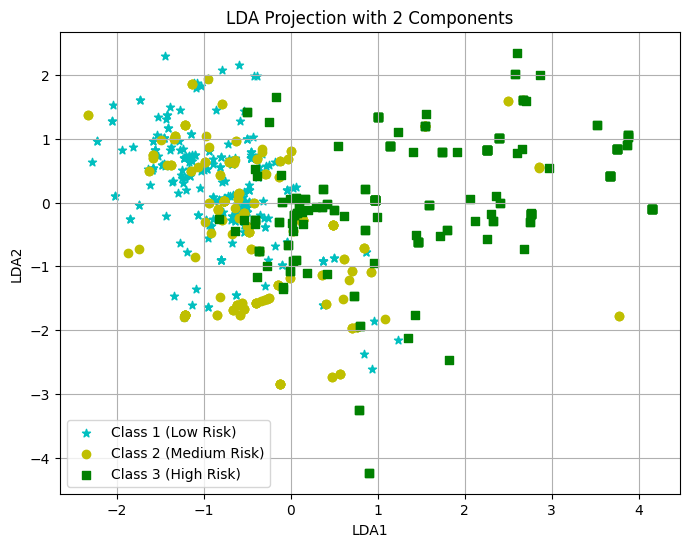

In [18]:
X_lda = lda.fit_transform(X_train_s, y_train)

# Separate the samples of each class.
X_lda_clase_1 = X_lda[y_train == 1]
X_lda_clase_2 = X_lda[y_train == 2]
X_lda_clase_3 = X_lda[y_train == 3]

# Plot the classes in the 2D LDA space.
plt.figure(figsize=(8, 6))
plt.scatter(X_lda_clase_1[:, 0], X_lda_clase_1[:, 1], color='c', marker='*', label='Class 1 (Low Risk)')
plt.scatter(X_lda_clase_2[:, 0], X_lda_clase_2[:, 1], color='y', marker='o', label='Class 2 (Medium Risk)')
plt.scatter(X_lda_clase_3[:, 0], X_lda_clase_3[:, 1], color='g', marker='s', label='Class 3 (High Risk)')

# Labels and legend.
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('LDA Projection with 2 Components')
plt.legend()
plt.grid(True)
plt.show()


---

**Question:** Based on the projection in the figure, which classes appear to be more easily confused with each other? Justify your answer by analyzing the overlap in the plot.



<font color = 'lightgreen'> According to this visualization, the low and medium risk classes are much more easily confused with each other than any one of them with the high risk class. This is clear as the points for the high risk class are visually in a more distinguishable region </font>

---

**Your task here is as follows:**

*  Calculate the **confusion matrix** for **the test set**. This matrix will help analyze how effectively the classifier distinguishes between classes.



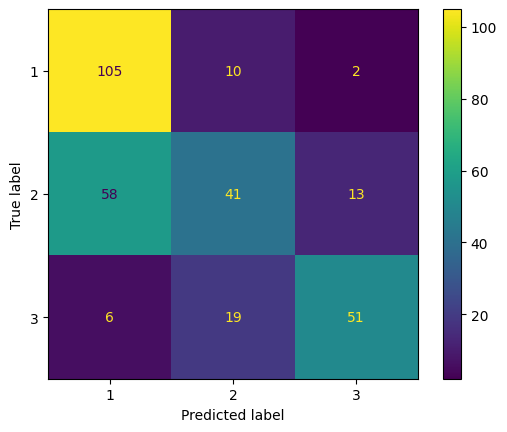

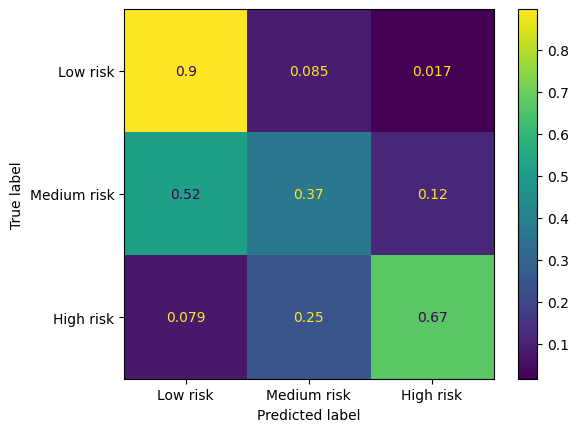

In [19]:
# NOTE: STUDENT CODE HERE
from sklearn.metrics import ConfusionMatrixDisplay as CMD

CMD.from_estimator(lda, X_test_s, y_test)
CMD.from_estimator(lda, X_test_s, y_test, display_labels=labels, normalize='true')


---
**Questions:** Which class is the easiest to predict correctly? Which class is most confused with others? Which classes are commonly confused with each other?

<font color = 'lightgreen'> According to the confusion matrix, the easiest class to predict is the low risk class (class 1) </font>

---

What happens now if `n_components=1`? Run the next code cell to see the result!

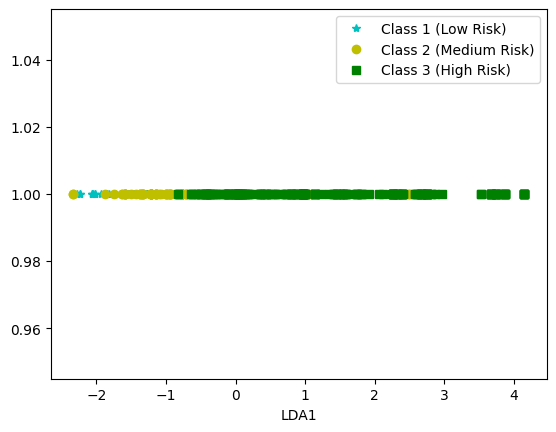

In [20]:
lda_1D = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda_1D.fit_transform(X_train_s,y_train)
plt.xlabel('LDA1')
X_lda_clase_1 = X_lda[y_train==1]
X_lda_clase_2 = X_lda[y_train==2]
X_lda_clase_3 = X_lda[y_train==3]

y1 = np.ones((X_lda_clase_1.shape[0],1))
y2 = np.ones((X_lda_clase_2.shape[0],1))
y3 = np.ones((X_lda_clase_3.shape[0],1))

plt.plot(X_lda_clase_1, y1, '*c', label='Class 1 (Low Risk)')
plt.plot(X_lda_clase_2, y2, 'oy', label='Class 2 (Medium Risk)')
plt.plot(X_lda_clase_3, y3, 'sg', label='Class 3 (High Risk)')


plt.legend()
plt.show()


---

**Question:** Do you expect to obtain the same accuracy rates on the training and test sets when using `n_components=2` as when using `n_components=1`? Justify your answer.


<font color = 'lightgreen'> A priori, I would expect lower accuracy with less components </font>

---

# 4.3.2  $k$-NN classifier

**$k$-Nearest Neighbors** (commonly referred to as **$k$-NN**) is a versatile, non-parametric classification algorithm suitable for both multiclass and binary classification problems. It classifies a sample based on the majority class among its $k$ nearest neighbors in the feature space. The decision boundaries formed by $k$-NN are typically non-linear, making it particularly effective for datasets where classes are not linearly separable. The algorithm's performance is influenced by the choice of $k$, the distance metric, and the weighting of neighbors.

To implement $k$-NN in Python, we will use the [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class from `scikit-learn`. This class provides several hyperparameters that can be tuned to optimize the algorithm'ss performance:

*   `n_neighbors`: It specifies the number of neighbors to consider for classification. Choosing an optimal value for $k$ is crucial, as smaller values of $k$ may lead to overfitting, while larger values can result in underfitting.
*   `weights`: It determines how neighbors are weighted. The options include:
  *   `uniform`: All $k$ neighbors contribute equally to the classification.
  *   `distance`: Neighbors are weighted based on their distance to the sample, so closer neighbors have a stronger influence on the classification.
*   `metric`: Defines the distance metric used to calculate the "nearness" of neighbors. The default is Euclidean distance, but other options (such as Manhattan or Minkowski distances) are also available, depending on the nature of the data.






**Your task here is as follows:**

1. **Hyperparameter tuning**

    Use the `GridSearchCV` class to find the optimal values for `n_neighbors` (the value of $k$) and `weights`. Perform the grid search with **standardized features** to optimize the classifier's performance. The parameter values to explore are:
    * `n_neighbors` $\in \{1,11,31,51,71,91,101\}$
    * `weights` $\in [{\text{uniform}, \text{distance}}]$

2. **Evaluate the best model**
  Once the optimal hyperparameters are identified, calculate the accuracy rate (as a percentage) on the test set using the `best_estimator_` attribute of `GridSearchCV`. Print the result, rounding it to two decimal places.


Please note that if the model was **trained** using the **standardized dataset**, it must also be **evaluated** on the **standardized test set** to ensure consistency in the feature scaling.





In [21]:
# Fine-tuning hyperparameters
# NOTE: STUDENT CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNNClassifier

knn_hparams = {
    'n_neighbors': [1, 11, 31, 51, 71, 91, 101],
    'weights': ['uniform', 'distance']
}

knn_gscv = GridSearchCV(KNNClassifier(), knn_hparams).fit(X_train_s, y_train)

print(f'Best hyperparameters: {knn_gscv.best_params_}')

Best hyperparameters: {'n_neighbors': 91, 'weights': 'distance'}


In [22]:
# Check the best model with the test set
# NOTE: STUDENT CODE HERE

knn = knn_gscv.best_estimator_
knn_acc_test = knn.score(X_test_s, y_test)

print(f'[KNN] Accuracy on test set: {knn_acc_test*100:.2f} %')

[KNN] Accuracy on test set: 78.36 %



---
**Question:** What are the most appropriate values of the hyperparameters `n_neighbors` and `weights` that you have obtained?

<font color = 'lightgreen'>The best <code>n_neighbors</code> is 91 and the best <code>weights</code> is <code>distance</code></font>

---

**Your task here is as follows:**

*  Calculate the **confusion matrix** for the **test set** using the **best model** obtained from the **grid search**. This matrix will help you analyze how effectively the classifier distinguishes between the classes.

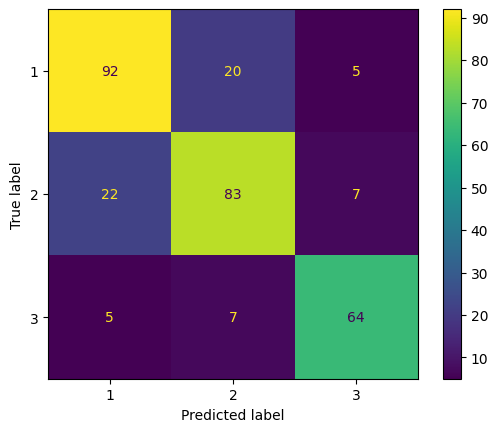

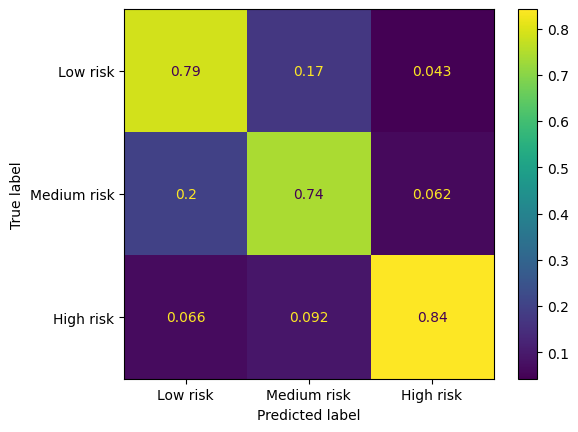

In [23]:
# NOTE: STUDENT CODE HERE

CMD.from_estimator(knn, X_test_s, y_test)
CMD.from_estimator(knn, X_test_s, y_test, display_labels=labels, normalize='true')


---
**Questions:** Which class is the easiest to predict correctly? Which class is most confused with others? Which classes are commonly confused with each other?

<font color = 'lightgreen'> As we can see in the normalized Confusion Matrix, or by dividing the nubmers in the non-normalized Confusion Matrix by the number of samples for each true label, the easiest label to predict is now 'High risk'. The classes most commonly confused are low risk and medium risk (both ways)</font>

---

# 4.3.3 Decision tree classifier

A **Decision Tree** (DT) is a powerful, non-parametric classification algorithm that can be used for both multiclass and binary classification problems. It classifies a sample by recursively splitting the feature space into regions, with each split designed to maximize class separation. The resulting model forms a tree-like structure, allowing it to adapt to complex, non-linear patterns in the data. However, this flexibility makes decision trees prone to overfitting, particularly when the tree is allowed to grow too deep.


To implement a Decision Tree in Python, we will use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class from `scikit-learn`. This class provides several hyperparameters that can be tuned to optimize the model's performance. Although many hyperparameters can be validated, we will focus on `max_depth`:

*   `max_depth`: This hyperparameter specifies the maximum depth of the tree. Controlling the depth helps mitigate overfitting by limiting the number of splits and, consequently, the model's complexity. Smaller values for `max_depth` may lead to underfitting, as the model might not capture sufficient patterns in the data, while larger values can increase the risk of overfitting by making the tree too complex.

The `DecisionTreeClassifier` class also includes other hyperparameters, such as `min_samples_split` and `min_samples_leaf`, which further control the growth of the tree. However, for simplicity, we will focus solely on validating `max_depth` in this task.




**Your task here is as follows:**

1.   **Hyperparameter tuning**

  Use the `GridSearchCV` class to find the optimal value for `max_depth`. Perform the grid search using **non-standardized features** to optimize the classifier's performance. The parameter values to explore are:
 * `max_depth` $\in \{1, 9, 17, 25,  33, 41\}$

2.   **Evaluate the best model**

  Once the optimal hyperparameter is identified, calculate the accuracy rate (as a percentage) on the test set using the `best_estimator_` attribute of `GridSearchCV`. Print the result, rounding the value to two decimal places.



In [24]:
# Fine-tuning hyperparameters
# NOTE: STUDENT CODE HERE
from sklearn.tree import DecisionTreeClassifier as DTClassifier

dt_hparams = {
    'max_depth': [1, 9, 17, 25, 33, 41],
}

dt_gscv = GridSearchCV(DTClassifier(), dt_hparams).fit(X_train, y_train)
print(f'Best hyperparameters: {dt_gscv.best_params_}')


Best hyperparameters: {'max_depth': 25}


In [25]:
# Check the best model with the test set
# NOTE: STUDENT CODE HERE

dt = dt_gscv.best_estimator_
dt_acc_test = dt.score(X_test, y_test)

print(f'[DT] Accuracy on test set: {dt_acc_test*100:.2f} %')


[DT] Accuracy on test set: 79.34 %



---
**Question:** Which is the most appropiate value of `max_depth` that you have obtained?


<font color = 'lightgreen'> The best value of <code>max_depth</code> was discovered to be 25. However, in other iterations of the same experiment, it could be 33.</font>

---


**Your task here is as follows:**

*  Calculate the **confusion matrix** for the **test set** using the **best model** obtained from the **grid search**.  This matrix will help you analyze how well the classifier distinguishes between classes.

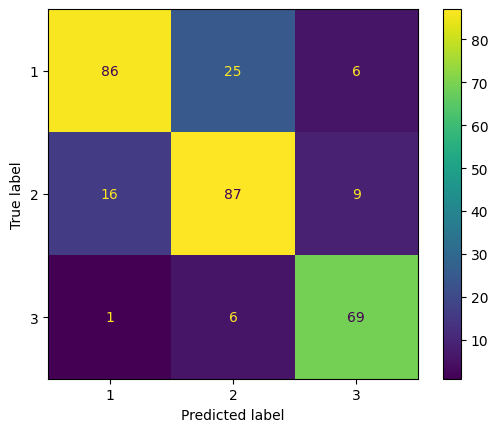

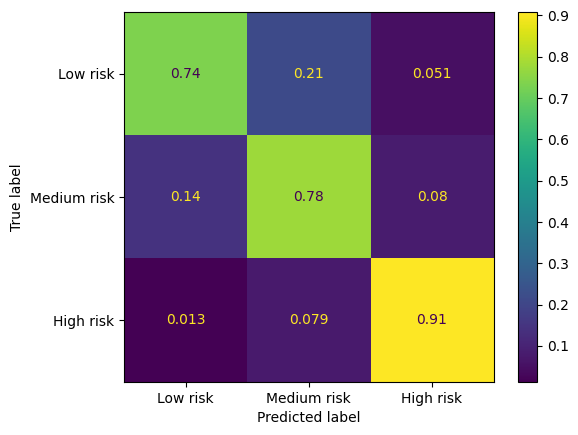

In [26]:
# NOTE: STUDENT CODE HERE

CMD.from_estimator(dt, X_test, y_test)
CMD.from_estimator(dt, X_test, y_test, display_labels=labels, normalize='true')


---
**Questions:** Which class is the easiest to predict correctly? Which class is most confused with others? Which classes are commonly confused with each other?

<font color = 'lightgreen'>Once again, the easiest class to predict seems to be 'High risk', and the most easily confused are 'Low risk' and 'Medium risk', specially predicting 'Medium risk' when the true label is 'Low risk'</font>

---

# 4.3.4 Random Forest classifier

A **Random Forest** (RF) is an ensemble learning method that combines multiple decision trees to improve classification performance and reduce the risk of overfitting associated with a single decision tree. Each tree in the ensemble is trained on a random subset of the data, and the final classification is determined by aggregating the predictions of all trees (e.g., by majority vote). This approach creates a model that is both powerful and less prone to overfitting than a single decision tree, making it well-suited for complex classification tasks.

To implement a Random Forest in Python, we will use the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) class from `scikit-learn`. This class includes several hyperparameters that can be adjusted to optimize performance, such as the total number of terminal nodes in each tree (`max_leaf_nodes`), the minimum number of samples required to split a node (`min_samples_split`), or the minimum number of samples per leaf node (`min_samples_leaf`), similar to those in `DecisionTreeClassifier`, among others.

In this assignment, we will focus on two key hyperparameters of the ensemble: the number of trees and the maximum depth of each tree. These are specified in `RandomForestClassifier` class as follows:

*   `n_estimators`: This parameter defines the number of decision trees in the ensemble. Increasing the number of trees generally improves model performance but it also increases computational cost. A higher `n_estimators` value often results in a more accurate model, though the improvement diminishes beyond a certain point.
*  `max_depth`: This parameter specifies the maximum depth of each individual tree in the forest. Limiting the depth helps prevent overfitting by restricting the number of splits in each tree, thus controlling the model's complexity. Smaller values of `max_depth` may result in underfitting, while larger values can increase the risk of overfitting.





**Your task here is as follows:**



1.   **Hyperparameter tuning**

  Use the `GridSearchCV` class to find the optimal values for both `n_estimators` and `max_depth`. Perform the grid search using **non-standardized features** to optimize the classifier's performance. The parameter values to explore are:

   * `n_estimators` $ \in \{10, 50, 100, 150\}$
   * `max_depth` $\in \{10,20,30,35\}$

   **Note**: Hyperparameter optimization for Random Forests typically requires more time compared to other models due to the need to train multiple trees for each parameter combination.

2.   **Evaluate the best model**

  Once the optimal hyperparameters are identified, calculate the accuracy rate (as a percentage) on the test set using the `best_estimator_` attribute of `GridSearchCV`. Print the result, rounding the value to two decimal places.





In [27]:
# Fine-tuning hyperparameters
# NOTE: STUDENT CODE HERE
from sklearn.ensemble import RandomForestClassifier as RFClassifier

rf_hparams = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [10, 20, 30, 35],
}

rf_gscv = GridSearchCV(RFClassifier(), rf_hparams, cv=10).fit(X_train, y_train)

print(f'Best hyperparameters: {rf_gscv.best_params_}')

Best hyperparameters: {'max_depth': 20, 'n_estimators': 50}


In [28]:
# Check the best model with the test set
# NOTE: STUDENT CODE HERE

rf = rf_gscv.best_estimator_
rf_acc_test = rf.score(X_test, y_test)

print(f'[RF] Accuracy on test set: {rf_acc_test*100:.2f} %')


[RF] Accuracy on test set: 80.98 %



---
**Question:** What are the most appropriate values of the hyperparameters `n_estimators` and `max_depth` that you have obtained?


<font color = 'lightgreen'>The best values obtained for the hyperparameters in this run were <code>max_depth</code> of 20 and <code>n_estimators</code> of 50. In other runs, the values were slightly different, so <strong>the number of cross-validation folds was increased to 10</strong> in an attempt to find the most consistent numbers. However, this didn't prevent the variations, and every run could be different.</font>

---

**Your task here is as follows:**

*  Calculate the **confusion matrix** for the **test set** using the **best model** obtained from the **grid search**.  This matrix will help you analyze how well the classifier distinguishes between classes.

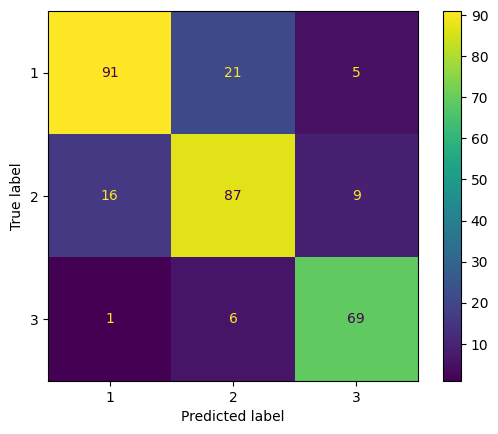

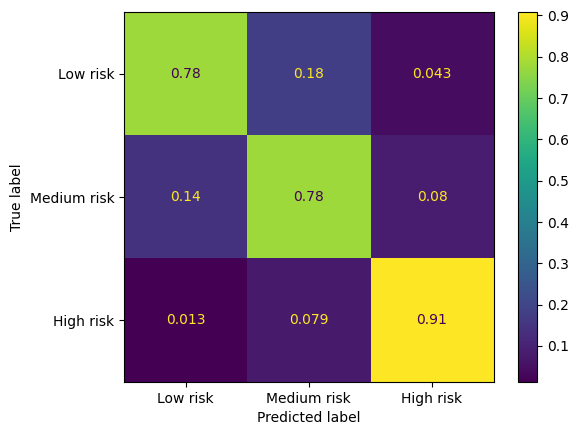

In [29]:
# NOTE: STUDENT CODE HERE

CMD.from_estimator(rf, X_test, y_test)
CMD.from_estimator(rf, X_test, y_test, display_labels=labels, normalize='true')


---
**Questions:** Which class is the easiest to predict correctly? Which class is most confused with others? Which classes are commonly confused with each other?

<font color = 'lightgreen'>The results were almost the same as the previous case (single decision tree)</font>

<font color = 'lightgreen'>The easiest class to predict is 'High risk', and the most easily confused are 'Low risk' and 'Medium risk', specially predicting 'Medium risk' when the true label is 'Low risk'</font>

---

# 4.4 Best classification model
It is often said that a picture is worth a thousand words, and visualizing our results can provide a quicker and deeper understanding of the classifiers we have developed. In this section, we will evaluate and determine which classification model is the best fit for our dataset!

**Your task here is as follows:**

  *  Create a bar plot representing the accuracy rate (in percentages) achieved by each classification model evaluated in this assignment. Use the **optimal hyperparameter values** for each model and display the results based on the **test set performance**.




In [30]:
# NOTE: STUDENT CODE HERE
def addlabels(heights, labels):
    for x,(y,s) in enumerate(zip(heights,labels)):
        plt.text(x-0.1,y+0.5,s)

Text(0, 0.5, 'Accuracy (percentage)')

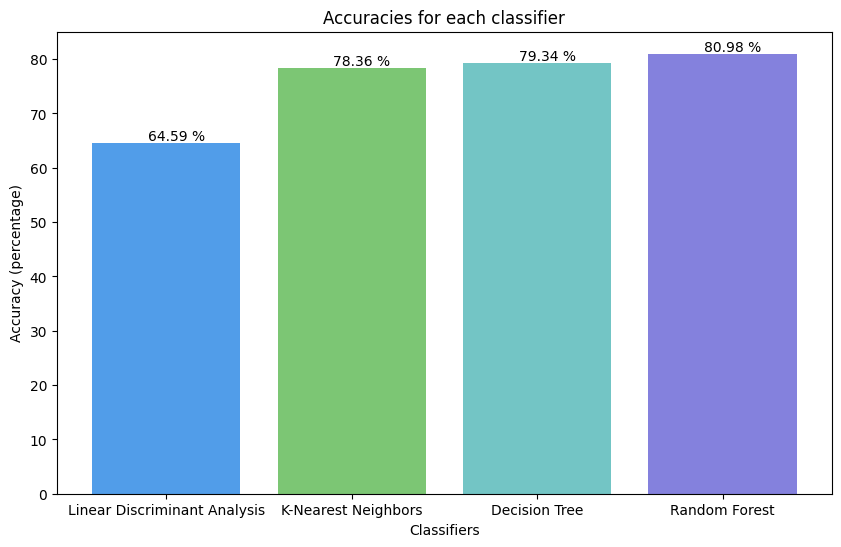

In [31]:
# NOTE: STUDENT CODE HERE

accs_percent = {
    "Linear Discriminant Analysis": lda_acc_test*100,
    "K-Nearest Neighbors": knn_acc_test*100,
    "Decision Tree": dt_acc_test*100,
    "Random Forest": rf_acc_test*100,
}

plt.figure(figsize=(10,6))
plt.bar(accs_percent.keys(), accs_percent.values(),
        color=['#519DE9', '#7CC674', '#73C5C5', '#8481DD'])
addlabels(*zip(*[(val,f'{val:.2f} %') for val in accs_percent.values()]))
plt.title('Accuracies for each classifier')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (percentage)')


---
**Question:** Which classification model achieved the highest accuracy rate on the test set?


<font color = 'lightgreen'>The most accurate in this test was the Random Forest classifier, but by a very small margin. Due to the random nature of these two classifiers, in other runs, the simple Decision Tree could outperform the Random Forest</font>

---

# 5. Binary classification: Low risk vs. high risk

# 5.1 Transforming the multiclass problem into a binary classification task

In this section, we will convert the original multiclass classification problem into a binary classification task. To accomplish this, we will focus exclusively on samples belonging to **class 1** (`low risk`) and **class 3** (`high risk`), excluding samples from other classes. By narrowing the scope to these two groups, we aim to evaluate the effectiveness of our models in distinguishing between the two most contrasting risk levels. This binary classification approach provides an opportunity to analyze the models' performance in a simpler, two-class scenario.



In the following lines of code, we will create a binary classification dataset by filtering the samples belonging to class 1 (`low risk`) and class 3 (`high risk`). First, we will apply a boolean mask to select these classes from both the training and test sets. Then, we will verify the number of samples remaining after the filtering process to ensure that the desired classes have been correctly isolated for this binary classification task.

In [32]:
# Create the boolean filter for values 1 and 3 in y
mask_train = (y_train == 1) | (y_train == 3)
mask_test = (y_test == 1) | (y_test == 3)

# Apply the filter to X and y
X_train_binary_s = X_train_s[mask_train]
y_train_binary = y_train[mask_train]

X_test_binary_s = X_test_s[mask_test]
y_test_binary = y_test[mask_test]

#  Convert 1 to 0 and 3 to 1 in y_train_binary and y_test_binary
y_train_binary = np.where(y_train_binary == 1, 0, 1)
y_test_binary = np.where(y_test_binary == 1, 0, 1)

**How many samples and features are in the dataset?**

In [33]:
# NOTE: STUDENT CODE HERE
n_train_binary_samples = len(X_train_binary_s)
print("The number of samples for training: ", n_train_binary_samples)
print("The number of features per sample: ", len(X_train_binary_s[0]))

The number of samples for training:  485
The number of features per sample:  6


In [34]:
# NOTE: STUDENT CODE HERE
n_test_binary_samples = len(X_test_binary_s)
print("The number of samples for test: ", n_test_binary_samples)

The number of samples for test:  193


We will also inspect the number of samples in each category of the target variable.



In [35]:
# NOTE: STUDENT CODE HERE
y_train_binary_counts = np.bincount(y_train_binary)
print(f'Training set class distribution:')
print(f'  Low risk: {y_train_binary_counts[0]}')
print(f'  High risk: {y_train_binary_counts[1]}')

y_test_binary_counts = np.bincount(y_test_binary)
print(f'Testing set class distribution:')
print(f'  Low risk: {y_test_binary_counts[0]}')
print(f'  High risk: {y_test_binary_counts[1]}')

Training set class distribution:
  Low risk: 289
  High risk: 196
Testing set class distribution:
  Low risk: 117
  High risk: 76


# 5.2 Binary classification performance

In addition to accuracy, we will evaluate binary classification performance using two additional metrics: the confusion matrix and the ROC (Receiver Operating Characteristic) curve (along with the AUC score).

The **confusion matrix** provides valuable insights in binary classification by displaying the counts of true positives, true negatives, false positives, and false negatives. These values allow us to compute specific probabilities, such as:
*   **False alarm rate**: The likelihood of incorrectly predicting the positive class.
*   **Miss rate**: The probability of failing to detect a true positive.
*   **Detection rate**: The probability of correctly identifying a positive instance.

Although commonly used in binary classification, the confusion matrix can also be applied to multiclass problems, where it expands into a grid with each cell representing the count of predictions for each actual class versus each predicted class. This provides a detailed view of misclassifications across multiple classes, helping to pinpoint areas where the model may struggle with specific categories.


The **ROC curve** and **AUC score**, on the other hand, provide valuable insight into the model's ability to distinguish between classes by illustrating the trade-off between the true positive rate and the false positive rate across various thresholds.




# 5.2.1 Confusion matrix

 For **binary classification**, the confusion matrix is a $2\times2$ grid that displays the counts of:

*   **True Positives** (TP): Correctly predicted positive samples.
*   **True Negatives** (TN): Correctly predicted negative samples.
*   **False Positives** (FP): Incorrectly predicted positive samples (commonly referred to as Type I errors).
*   **False Negative**s (FN): Incorrectly predicted negative samples (commonly referred to as Type II errors).

Below is a visual representation of a confusion matrix for binary classification:


\begin{array}{c|cc}
           & \text{Predicted Positive} & \text{Predicted Negative} \\
    \hline
    \text{Actual Positive} & \text{TP} & \text{FN}\\
    \text{Actual Negative} & \text{FP} & \text{TN} \\
\end{array}



This layout helps us derive specific metrics, such as the probability of false alarm, miss, and detection, as discussed in the previous section.




# 5.2.2 ROC Curve and AUC Score

The **ROC Curve** is a graphical representation of a classification model’s ability to distinguish between classes at various threshold levels. It plots the **True Positive Rate** (TPR)—also known as *sensitivity* or *recall*—on the y-axis against the **False Positive Rate** (FPR) on the x-axis, where:

*   **True Positive Rate** (TPR):  The proportion of actual positives correctly classified by the model:

  $$\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$
  
*   **False Positive Rate** (FPR): The proportion of actual negatives incorrectly classified as positives:
$$\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$$

An ideal ROC curve will pass through the top left corner of the plot (TPR $= 1$, FPR $= 0$), representing a perfect classifier with high sensitivity and no false positives.


**AUC (Area Under the Curve)** quantifies the overall ability of the model to distinguish between positive and negative classes, regardless of the threshold. The AUC score ranges from $0$ to $1$, where:
*  **AUC = 1**: It represents a perfect classifier.
*  **AUC = 0.5**: It represents a model with no discriminative power, equivalent to random guessing.
*  **AUC < 0.5**: It indicates that the model is performing worse than random guessing.

A higher AUC score reflects better model performance, as it signifies stronger discrimination between the positive and negative classes across all possible thresholds.

The ROC Curve and AUC score together provide a holistic evaluation of model performance, especially in scenarios with imbalanced datasets, where metrics like accuracy can be misleading. AUC is particularly valuable as it remains unaffected by class distribution, highlighting the model's robustness in handling varying thresholds.


> **Implementation in Python:**

> To compute and visualize the ROC curve along with the AUC score using `scikit-learn` and `matplotlib`, you can follow these steps:

  1.   Compute the FPR and TPR: Use [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) with the true labels and predicted probabilities.
  2.   Calculate the AUC: Use [auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc) with the FPR and TPR values.
  3. Visualize the ROC Curve: Use matplotlib to plot the ROC curve.


# 5.3 Implementation and evaluation of logistic regressor clasifier's performance

**Logistic Regression** (LR) is a classification method commonly used for **binary classification problems**. It models the probability of a sample belonging to a particular class by applying a logistic function to a linear combination of the input features. This produces output values between $0$ and $1$, which can be interpreted as probabilities, creating linear decision boundaries. LR is effective for binary classification and can also be extended to multiclass problems through the one-vs-rest or multinomial approach. This approach is out of the scope of this assignment; for this reason, this classifier has been implemented to solve a binary classification problem.

To implement a logistic regression classifier in Python, we will use the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class from `scikit-learn`, which performs regularized logistic regression. This involves adding a penalty term (controlled by the `penalty` hyperparameter) to the loss function to prevent overfitting by discouraging large coefficient values. The available regularization options include:
*   **$\ell_1$ regularization**: It adds an $\ell_1$ penalty, which is the absolute value of the coefficients' magnitudes. This method is similar to that used in Lasso regression and encourages sparsity in the model.
*   **$\ell_2$ regularization**: It adds an $\ell_2$ penalty, which is the square of the coefficients' magnitudes. This method is the default choice and is similar to Ridge or Kernel Ridge regression, resulting in a more stable solution without necessarily forcing coefficients to zero.

We can also choose to disable regularization by setting the parameter `penalty` to `None`.

The strength of regularization is controlled by the hyperparameter `C`, which is the inverse of regularization strength and must be a positive float. Smaller values of `C` imply stronger regularization, similar to the behavior of the `alpha` hyperparameter in Lasso, Ridge, and KernelRidge models in `scikit-learn`.




**Your task here is as follows:**

*   Find the optimal values for `C` and `penalty`. To do so, implement a grid search using `GridSearchCV` with standardized features to optimize the classifier's performance. The values to be explored are listed below:



*   Once the optimal hyperparameters have been found, use the `best_estimator_` attribute of `GridSearchCV` to calculate the accuracy rate on the test set and print the result. Please round the value to two decimal places.

**Your task here is as follows:**

1.   **Hyperparameter tuning**

  Use the `GridSearchCV` class to find the optimal values for `C` (the value of $k$) and `penalty`. Perform the grid search with **standardized features** to optimize the classifier's performance. The parameter values to explore are:
  * `C` $ \in \{0.01,0.05, 0.1, 0.5, 1, 5, 10\}$
  * `penalty` $\in$ {`l1`, `l2`}.
2.   **Evaluate the best model**
  Once the optimal hyperparameters are identified, calculate the accuracy rate (as a percentage) on the test set using the `best_estimator_` attribute of `GridSearchCV`. Print the result, rounding it to two decimal places.

Please note that if the model was **trained** using the **standardized dataset**, it must also be **evaluated** on the **standardized test set** to ensure consistency in the feature scaling.




In [36]:
# Fine-tuning hyperparameters
# NOTE: STUDENT CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression as LR

lr_hparams = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'penalty': ['l1', 'l2']
}

lr_gscv = GridSearchCV(LR(), lr_hparams).fit(X_train_binary_s, y_train_binary)

print(f'Best hyperparameters: {lr_gscv.best_params_}')

Best hyperparameters: {'C': 5, 'penalty': 'l2'}


In [37]:
# Check the best model with the test set
# NOTE: STUDENT CODE HERE

lr = lr_gscv.best_estimator_
lr_acc_test = lr.score(X_test_binary_s, y_test_binary)

print(f'[LR] Accuracy on test set: {lr_acc_test*100:.2f} %')

[LR] Accuracy on test set: 87.56 %



---
**Question:** What are the most appropriate values of the hyperparameters `C` and `penalty` that you have obtained?


<font color = 'lightgreen'>The best <code>C</code> is 5 and the best <code>penalty</code> is <code>l2</code></font>

---

**Your task here is as follows:**

* Calculate the **confusion matrix** for the **test set** using the **best model** obtained from the **grid search**.




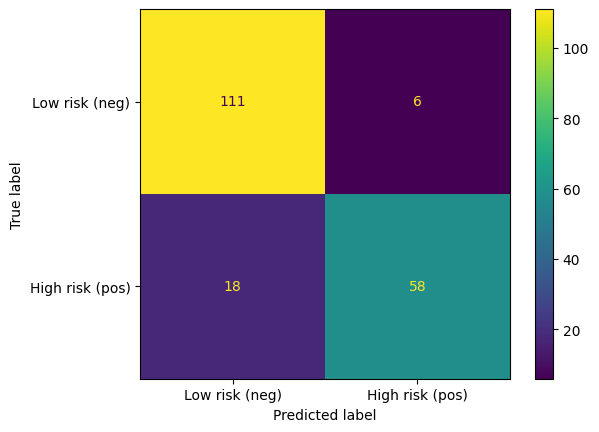

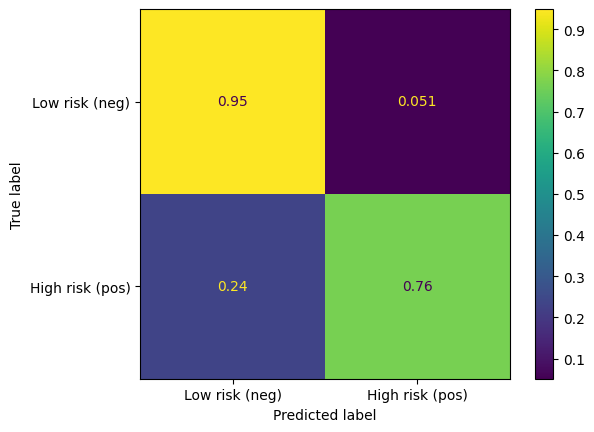

In [38]:
# NOTE: STUDENT CODE HERE

labels= [
    'Low risk (neg)',
    'High risk (pos)'
]

CMD.from_estimator(lr, X_test_binary_s, y_test_binary, display_labels=labels)
CMD.from_estimator(lr, X_test_binary_s, y_test_binary, display_labels=labels, normalize='true')


---
**Question:** Using the confusion matrix, indicate the number of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

<font color = 'lightgreen'>The results are: TP=58, TN=111, FP=6, FN=18</font>

---


---
**Question:** How can you compute the accuracy rate, the probability of false alarm, and the probability of miss from the confusion matrix?"

<font color = 'lightgreen'>The accuracy rate can be found using the <code>.score</code> method.</font>

$$
\text{Accuracy} = 87.56 \%
$$

<font color = 'lightgreen'> The probability of false can be seen in the normalized confusion matrix, where each entry is divided by the number of samples with that expected label (row total). It can also be found using the following equations:</font>

<!--
Tp = 58
Tn = 111
Fp = 6
Fn = 18
P_fa = Fp / (Fp + Tn)
P_M = Fn / (Fn + Tp)
-->

$$
P_{FA} = \frac{FP}{FP+TN} = \frac{6}{6+111} \approx 5.13 \%
$$

$$
P_M = \frac{FN}{TP+FN} = \frac{18}{58+18} \approx 23.68 \%
$$

---

**Your task here is as follows:**

*   Plot the ROC curve for the LR classifier using the **test set**.
*   Calculate the AUC and display the result.




  $\underline{\text{Hint}}$: Remember that the `y_score` parameter in [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) represents the probability estimates for the positive class. In binary classification, the `predict_proba` method provides probability estimates for each class, specifically the likelihood that a sample belongs to the negative or positive class. The second column corresponds to the probability that a sample belongs to the positive class. By utilizing only these probabilities, the ROC curve assesses classifier performance over a range of thresholds. If the probability exceeds a given threshold (e.g., $0.5$), the sample is classified as positive; otherwise, it is classified as negative.



Text(0, 0.5, 'TPR (Probability of Detection $P_D$)')

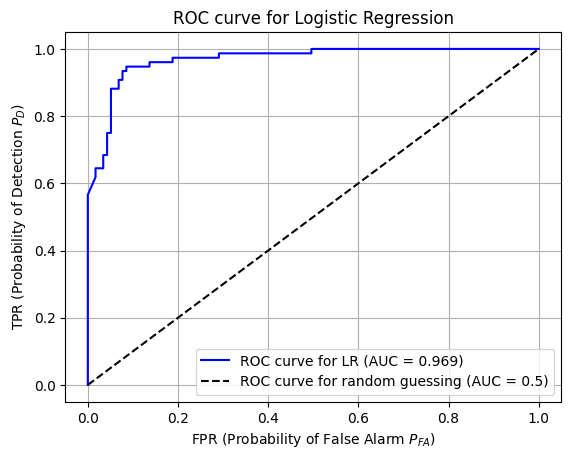

In [39]:
# NOTE: STUDENT CODE HERE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay as RCDisplay

# Manual procedure:

# 1. Get the probability estimates for the positive class
y_test_bin_pos_estimates = lr.predict_proba(X_test_binary_s)[:,1]

# 2. Compute the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_bin_pos_estimates)

# 3. Compute the AUC
roc_curve_lr_auc = auc(fpr, tpr)

# 4. Plot the ROC curve and display the AUC
plt.plot(fpr, tpr, 'b-', label=f'ROC curve for LR (AUC = {roc_curve_lr_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='ROC curve for random guessing (AUC = 0.5)')
plt.grid(True)
plt.legend()

plt.title('ROC curve for Logistic Regression')
plt.xlabel('FPR (Probability of False Alarm $P_{FA}$)')
plt.ylabel('TPR (Probability of Detection $P_D$)')

# Using the RCDisplay class:
# rcd = RCDisplay.from_estimator(lr, X_test_binary_s, y_test_binary,
#                                pos_label=1)
# rcd.ax_.plot([0, 1], [0, 1], 'k--')


---
**Question:** What is the value of AUC metric for the test set?


<font color = 'lightgreen'>The AUC is 0.97, very close to the ideal value of 1</font>

---